In [2]:
#Importing all the Libraries 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [3]:
#Loading Data
df_cluster = pd.read_csv(r"C:\Users\vanis\Downloads\Dataset_cluster.csv")
df_cluster.head()

,yearly_trips,budget,loyalty_score,airline_choice_index,hotel_preference_score
0,1.84,108444.5,1,2,2
1,3.10,25204.7,2,2,2
2,2.99,23513.4,2,2,2
3,8.13,71020.2,2,2,2
4,8.25,66071.8,2,2,2


In [4]:
# Check nulls
df_cluster.info()
df_cluster.isnull().sum()

# Subset for clustering
X_cluster = df_cluster[['yearly_trips', 'budget']]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   yearly_trips            1000 non-null   float64
 1   budget                  1000 non-null   float64
 2   loyalty_score           1000 non-null   int64  
 3   airline_choice_index    1000 non-null   int64  
 4   hotel_preference_score  1000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 39.2 KB


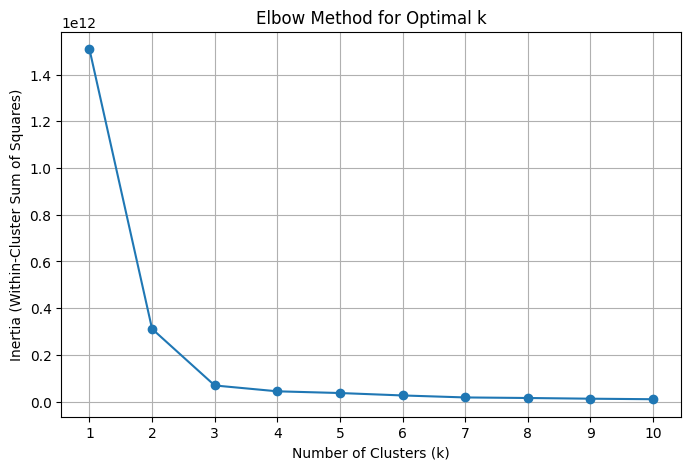

In [5]:
# Calculate inertia for k = 1 to 10
inertia = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_cluster)
    inertia.append(kmeans.inertia_)

# Plot the Elbow curve
plt.figure(figsize=(8,5))
plt.plot(k_values, inertia, marker='o')
plt.title("Elbow Method for Optimal k")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia (Within-Cluster Sum of Squares)")
plt.xticks(k_values)
plt.grid(True)
plt.show()

In [6]:
#Run Clustering (K-means & Agglomerative)

# K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
df_cluster['kmeans_cluster'] = kmeans.fit_predict(X_cluster)

# Agglomerative Clustering
agg = AgglomerativeClustering(n_clusters=3)
df_cluster['agg_cluster'] = agg.fit_predict(X_cluster)


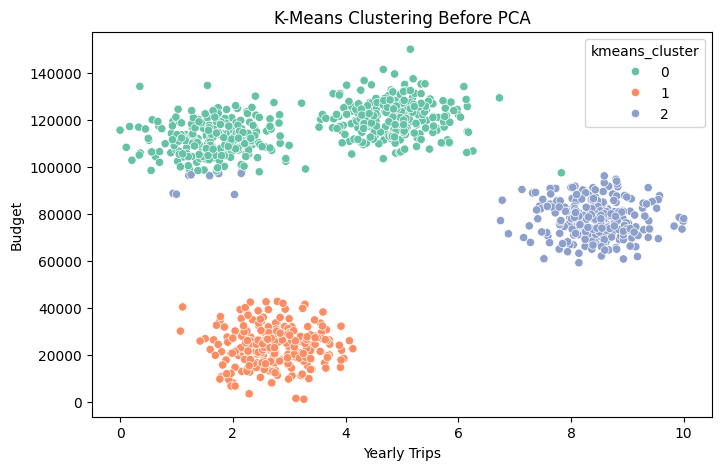

In [7]:
# Scatter plot of original clustering input space
plt.figure(figsize=(8,5))
sns.scatterplot(data=df_cluster, x='yearly_trips', y='budget', hue='kmeans_cluster', palette='Set2')
plt.title("K-Means Clustering Before PCA")
plt.xlabel("Yearly Trips")
plt.ylabel("Budget")
plt.show()


In [8]:
#Clusterwise summary
df_cluster.groupby('kmeans_cluster')[['yearly_trips', 'budget']].agg(['mean', 'min', 'max', 'std'])


yearly_trips                                budget           \
                       mean   min    max       std           mean      min   
kmeans_cluster                                                               
0                  3.276430  0.00   7.83  1.714632  116324.710953  97396.3   
1                  2.728440  1.07   4.13  0.581521   23442.093200   1000.0   
2                  8.212023  0.94  10.00  1.335454   78276.232685  59097.7   

                                       
                     max          std  
kmeans_cluster                         
0               150000.0  8566.527714  
1                42644.1  8112.397682  
2                97161.3  7986.180399

### Cluster-wise Behavioral Insights (K-Means)

#### Observations:

**Clear differentiation:**
- **Cluster 0** has a much higher **average budget** and a broader **spending range** than the others.
- **Cluster 2** exhibits the **highest travel frequency**, indicating frequent flyers.
- **Cluster 1** scores lowest on both metrics — a distinct **budget-conscious segment** with fewer trips.

**Low overlap:**
- The **budget ranges** between clusters are well separated, indicating clear financial segmentation.
- The **trip frequency** ranges are also relatively distinct, especially for **Cluster 2**, further validating meaningful segmentation.

**Stable groupings:**
- **Standard deviations** across clusters are reasonable and controlled.
- No cluster shows an erratic spread, suggesting that the clustering structure is statistically reliable.

####  Final Insight:

Each K-Means cluster reflects a **distinct behavioral profile** with **minimal overlap** in `yearly_trips` and `budget`.  
This confirms that clustering based on these two variables has effectively segmented business travelers into:
- **High-spend, infrequent travelers**
- **Low-spend, infrequent travelers**
- **High-frequency, moderate-spend travelers**


# KMeans with PCA

In [9]:

# Original features
X_cluster = df_cluster[['yearly_trips', 'budget']]

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_cluster)


In [10]:
# Apply KMeans to PCA-transformed data
kmeans_pca = KMeans(n_clusters=3, random_state=42)
pca_cluster_labels = kmeans_pca.fit_predict(X_pca)


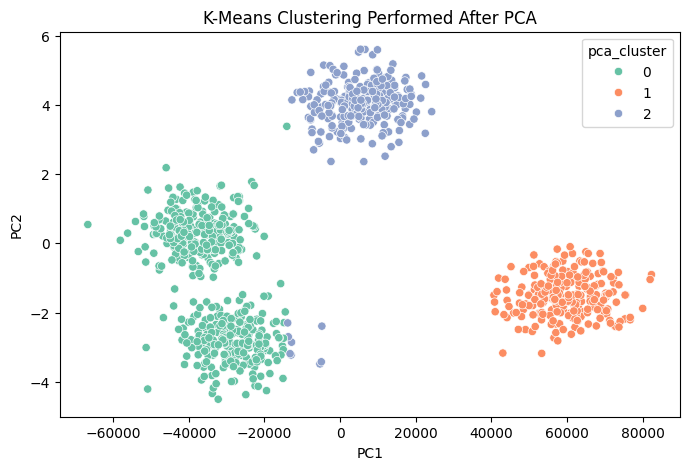

In [11]:
# Prepare DataFrame for plotting
df_pca_kmeans = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_pca_kmeans['pca_cluster'] = pca_cluster_labels

# Plot the PCA-based clusters
plt.figure(figsize=(8,5))
sns.scatterplot(data=df_pca_kmeans, x='PC1', y='PC2', hue='pca_cluster', palette='Set2')
plt.title("K-Means Clustering Performed After PCA")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()


In [12]:
#Cluster comparison using confusion matrix
pd.crosstab(
    df_cluster['kmeans_cluster'],
    df_pca_kmeans['pca_cluster'],
    rownames=['KMeans Before PCA'],
    colnames=['KMeans After PCA']
)


KMeans After PCA,0,1,2
KMeans Before PCA,,,
0,493,0,0
1,0,250,0
2,0,0,257


In [13]:
# Variance explained by each principal component
explained_variance = pca.explained_variance_ratio_
print("Explained variance ratio:", explained_variance)
print("Total variance retained:", explained_variance.sum())


Explained variance ratio: [9.99999995e-01 4.65907759e-09]
Total variance retained: 1.0


The clustering results using K-Means before and after PCA were identical, as confirmed by a 
perfect one-to-one match in the confusion matrix. This outcome is expected since PCA preserved
nearly 100% of the data variance and only reoriented the 2D space 
without altering the relative distances between data points.”

# Agglomerative Clustering Before PCA

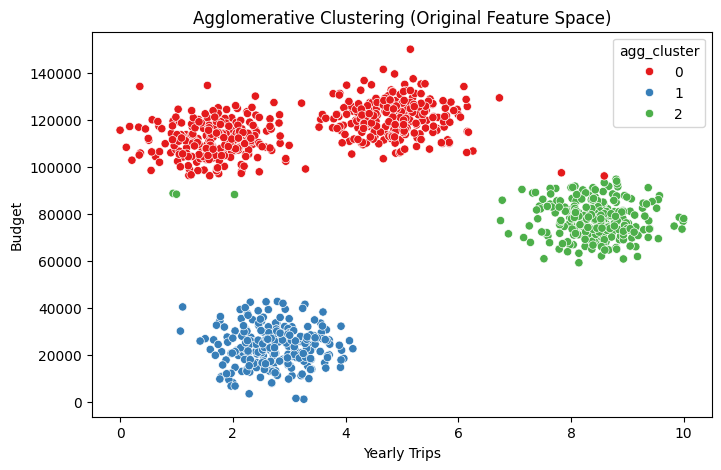

In [14]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df_cluster, x='yearly_trips', y='budget', hue='agg_cluster', palette='Set1')
plt.title("Agglomerative Clustering (Original Feature Space)")
plt.xlabel("Yearly Trips")
plt.ylabel("Budget")
plt.show()


In [15]:
#Comparison with K-Means
pd.crosstab(
    df_cluster['kmeans_cluster'],
    df_cluster['agg_cluster'],
    rownames=['KMeans Cluster'],
    colnames=['Agglomerative Cluster']
)


Agglomerative Cluster,0,1,2
KMeans Cluster,,,
0,493,0,0
1,0,250,0
2,6,0,251


### K-Means vs. Agglomerative Clustering: Comparison Insights

Both algorithms mostly agree — the clustering structure is stable and reliable.

- Out of all data points, only **6 were assigned differently** between the K-Means and Agglomerative methods.
- This small discrepancy is expected and can be attributed to the underlying mechanics of each algorithm:

  - **K-Means**:
    - Optimizes for **spherical, centroid-based clusters**
    - Sensitive to distance from centroids
    - Works best with evenly sized, compact clusters

  - **Agglomerative Clustering** (Ward's linkage by default):
    - Merges clusters based on **minimizing within-cluster variance**
    - Can capture **elongated or variance-respecting shapes**
    - Often creates more natural-looking clusters when data isn't perfectly spherical

- As seen in the plots, Agglomerative Clustering tended to produce **slightly more elongated or variance-respecting cluster shapes**, especially in areas where data density varies.



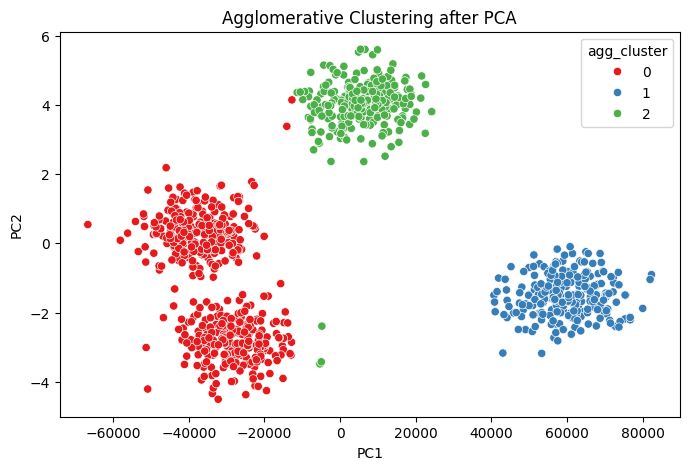

In [17]:
df_pca_kmeans['agg_cluster'] = df_cluster['agg_cluster']  # add it to your PCA plot data

plt.figure(figsize=(8,5))
sns.scatterplot(data=df_pca_kmeans, x='PC1', y='PC2', hue='agg_cluster', palette='Set1')
plt.title("Agglomerative Clustering after PCA")
plt.show()


Agglomerative Clustering after PCA

To validate the cluster structure formed by Agglomerative Clustering, we visualized the results in the PCA-reduced space (PC1 and PC2).

- Clusters remained clearly separated in PCA space, indicating that PCA preserved the core structure of the original data.
- This supports the earlier findings from the original feature space.
- While PCA was not necessary for dimensionality reduction (since only 2 features were used), it served as a useful tool for visual validation.

> Overall, Agglomerative Clustering proved to be robust and comparable to K-Means, with very minor differences in point assignments.